In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

Prediction goals
- get the variables that will help to understand the model
- How well those variables describe the dependent variable that is the price of the car

In [2]:
# Read the file
car = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# Splitiing company name from car model
import re
def split(x):
    y = re.split('[- ]',x)
    return y[0]

car['brand'] = car['CarName'].apply(split)
car['brand'].head()

0    alfa
1    alfa
2    alfa
3    audi
4    audi
Name: brand, dtype: object

In [5]:
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [6]:
car.brand.unique()

array(['alfa', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'maxda', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'porcshce',
       'renault', 'saab', 'subaru', 'toyota', 'toyouta', 'vokswagen',
       'volkswagen', 'vw', 'volvo'], dtype=object)

In [7]:
# Correcting the spelling mistakes
replace_values = {'vokswagen':'volkswagen','vw':'volkswagen','maxda':'mazda','toyouta':'toyota','porcshce':'porsche'}
car['brand'] = car['brand'].replace(replace_values)
car['brand'].unique()

array(['alfa', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi', 'Nissan',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

## Converting to dummy values

In [8]:
DriveWheel = pd.get_dummies (car['drivewheel'],drop_first=True)
EngineType = pd.get_dummies (car['enginetype'],drop_first=True)
Company = pd.get_dummies (car['brand'],drop_first=True)
CarBody = pd.get_dummies (car['carbody'],drop_first=True)
FuelSystem = pd.get_dummies (car['fuelsystem'],drop_first=True)

In [9]:

car = pd.concat([car, Company], axis=1)
car = pd.concat([car, CarBody], axis=1)
car = pd.concat([car, DriveWheel], axis=1)
car = pd.concat([car, EngineType], axis=1)
car = pd.concat([car, FuelSystem], axis=1)

In [10]:
car['cylindernumber'].unique()#check the unique values
replace_val = {'four':4,'six':6,'five':5,'three':3,'two':2,'eight':8,'twelve':12}
car['cylindernumber'] = car['cylindernumber'].replace(replace_val)
from word2number import w2n
car['doornumber'] = car['doornumber'].apply(lambda x : w2n.word_to_num(x))
# Convert enginelocation front:0 or rear : 1
car['enginelocation'] = car['enginelocation'].map({'front':0,'rear':1})
car['fueltype'] = car['fueltype'].map({'gas':0,'diesel':1})
# Convert aspiration std : 0 or turbo : 1
car['aspiration'] = car['aspiration'].map({'std':0,'turbo':1})

## Drop the string columns

In [11]:
# check the object data types and then drop them
car.select_dtypes(include = 'object')
car = car.drop(['CarName','carbody','drivewheel','enginetype','fuelsystem','brand'],axis=1)

### Derived metrics

In [12]:
car['Torque'] = (car['horsepower']*5252)/car['peakrpm']
car['EngineDisplacement'] = (0.78*car['stroke']*car['stroke']*car['cylindernumber'])

In [13]:
car.head()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,Torque,EngineDisplacement
0,1,3,0,0,2,0,88.6,168.8,64.1,48.8,...,0,0,0,0,0,1,0,0,116.594400,22.409088
1,2,3,0,0,2,0,88.6,168.8,64.1,48.8,...,0,0,0,0,0,1,0,0,116.594400,22.409088
2,3,1,0,0,2,0,94.5,171.2,65.5,52.4,...,0,0,0,0,0,1,0,0,161.761600,56.351412
3,4,2,0,0,4,0,99.8,176.6,66.2,54.3,...,0,0,0,0,0,1,0,0,97.400727,36.067200
4,5,2,0,0,4,0,99.4,176.6,66.4,54.3,...,0,0,0,0,0,1,0,0,109.814545,45.084000


In [14]:
# check the list of columns that we have
list(car.columns.values)

['car_ID',
 'symboling',
 'fueltype',
 'aspiration',
 'doornumber',
 'enginelocation',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'cylindernumber',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price',
 'alfa',
 'audi',
 'bmw',
 'buick',
 'chevrolet',
 'dodge',
 'honda',
 'isuzu',
 'jaguar',
 'mazda',
 'mercury',
 'mitsubishi',
 'nissan',
 'peugeot',
 'plymouth',
 'porsche',
 'renault',
 'saab',
 'subaru',
 'toyota',
 'volkswagen',
 'volvo',
 'hardtop',
 'hatchback',
 'sedan',
 'wagon',
 'fwd',
 'rwd',
 'dohcv',
 'l',
 'ohc',
 'ohcf',
 'ohcv',
 'rotor',
 '2bbl',
 '4bbl',
 'idi',
 'mfi',
 'mpfi',
 'spdi',
 'spfi',
 'Torque',
 'EngineDisplacement']

In [15]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 64 columns):
car_ID                205 non-null int64
symboling             205 non-null int64
fueltype              205 non-null int64
aspiration            205 non-null int64
doornumber            205 non-null int64
enginelocation        205 non-null int64
wheelbase             205 non-null float64
carlength             205 non-null float64
carwidth              205 non-null float64
carheight             205 non-null float64
curbweight            205 non-null int64
cylindernumber        205 non-null int64
enginesize            205 non-null int64
boreratio             205 non-null float64
stroke                205 non-null float64
compressionratio      205 non-null float64
horsepower            205 non-null int64
peakrpm               205 non-null int64
citympg               205 non-null int64
highwaympg            205 non-null int64
price                 205 non-null float64
alfa              

## Normalize the data

In [16]:
#defining a normalisation function 
def normalize (x): 
    return ( (x-np.min(x))/ (max(x) - min(x)))                                      
# applying normalize ( ) to all columns 
# def standardise (x): 
#     return ( (x-np.mean(x))/ np.std(x))
car = car.apply(normalize)

In [17]:
car.head()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,Torque,EngineDisplacement
0,0.000000,1.0,0.0,0.0,0.0,0.0,0.058309,0.413433,0.316667,0.083333,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.297482,0.132922
1,0.004902,1.0,0.0,0.0,0.0,0.0,0.058309,0.413433,0.316667,0.083333,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.297482,0.132922
2,0.009804,0.6,0.0,0.0,0.0,0.0,0.230321,0.449254,0.433333,0.383333,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.497537,0.631992
3,0.014706,0.8,0.0,0.0,1.0,0.0,0.384840,0.529851,0.491667,0.541667,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.212470,0.333744
4,0.019608,0.8,0.0,0.0,1.0,0.0,0.373178,0.529851,0.508333,0.541667,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.267453,0.466322


In [18]:
list(car.columns)

['car_ID',
 'symboling',
 'fueltype',
 'aspiration',
 'doornumber',
 'enginelocation',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'cylindernumber',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price',
 'alfa',
 'audi',
 'bmw',
 'buick',
 'chevrolet',
 'dodge',
 'honda',
 'isuzu',
 'jaguar',
 'mazda',
 'mercury',
 'mitsubishi',
 'nissan',
 'peugeot',
 'plymouth',
 'porsche',
 'renault',
 'saab',
 'subaru',
 'toyota',
 'volkswagen',
 'volvo',
 'hardtop',
 'hatchback',
 'sedan',
 'wagon',
 'fwd',
 'rwd',
 'dohcv',
 'l',
 'ohc',
 'ohcf',
 'ohcv',
 'rotor',
 '2bbl',
 '4bbl',
 'idi',
 'mfi',
 'mpfi',
 'spdi',
 'spfi',
 'Torque',
 'EngineDisplacement']

In [19]:
#get the index of price
a = list(car.columns.values)
display(a.index('price'))
#we need to relocate price column
car = car.reindex(columns=(['price'] + list([x for x in car.columns if x!='price'])))
a = list(car.columns.values)
a.index('price')

20

0

In [76]:
b = list(car.columns.values)
display(car.head())
X = car.iloc[:,1:]
y = car['price']
display(X.head())

,price,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,...,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,Torque,EngineDisplacement
0,0.207959,0.000000,1.0,0.0,0.0,0.0,0.0,0.058309,0.413433,0.316667,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.297482,0.132922
1,0.282558,0.004902,1.0,0.0,0.0,0.0,0.0,0.058309,0.413433,0.316667,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.297482,0.132922
2,0.282558,0.009804,0.6,0.0,0.0,0.0,0.0,0.230321,0.449254,0.433333,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.497537,0.631992
3,0.219254,0.014706,0.8,0.0,0.0,1.0,0.0,0.384840,0.529851,0.491667,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.212470,0.333744
4,0.306142,0.019608,0.8,0.0,0.0,1.0,0.0,0.373178,0.529851,0.508333,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.267453,0.466322


,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,Torque,EngineDisplacement
0,0.000000,1.0,0.0,0.0,0.0,0.0,0.058309,0.413433,0.316667,0.083333,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.297482,0.132922
1,0.004902,1.0,0.0,0.0,0.0,0.0,0.058309,0.413433,0.316667,0.083333,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.297482,0.132922
2,0.009804,0.6,0.0,0.0,0.0,0.0,0.230321,0.449254,0.433333,0.383333,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.497537,0.631992
3,0.014706,0.8,0.0,0.0,1.0,0.0,0.384840,0.529851,0.491667,0.541667,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.212470,0.333744
4,0.019608,0.8,0.0,0.0,1.0,0.0,0.373178,0.529851,0.508333,0.541667,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.267453,0.466322


### Let us split the data and go ahead with dropping variables based on VIF

In [21]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [22]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [23]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Let's calculate the RMSE of the default model without applying any reductions

In [24]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
lm = LinearRegression()
lm.fit(X_train,y_train)
y_pred1=lm.predict(X_test)
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

RMSE : 0.08893206484362778


In [25]:
lm = LinearRegression()
rfe = RFE(lm, 20)    # running RFE
rfe = rfe.fit(X_train, y_train)
# Get the boolean results
print(rfe.support_)
print(rfe.ranking_)

[ True False False False False False False False False False  True  True
  True  True  True False  True  True False False  True  True  True  True
  True False False  True  True False False False False False False  True
 False False False  True  True False False False False False False False
 False False False False False False False False False False False False
 False  True  True]
[ 1 35 23 14 34 10 19 11  9 13  1  1  1  1  1 28  1  1 26 40  1  1  1  1
  1  3  2  1  1  4 42 20 33 21  7  1  8 27 12  1  1  6 16 15 17 18 37 31
  5 22 32 25 36 24 30 41 29 43 39 38 44  1  1]


In [26]:
col = X_train.columns[rfe.support_]

In [27]:
X_train_rfe = X_train[col]

In [28]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [29]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [30]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     95.31
Date:                Wed, 29 Aug 2018   Prob (F-statistic):           1.29e-64
Time:                        11:41:11   Log-Likelihood:                 233.22
No. Observations:                 143   AIC:                            -424.4
Df Residuals:                     122   BIC:                            -362.2
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2115      0

### Let's check the VIF value of each column of the RFE suggested data set

In [31]:
a = list(col)
a.append('price')
vif_cal(input_data=car[a],dependent_col='price')

,Var,Vif
18,Torque,802.30
6,horsepower,732.69
19,EngineDisplacement,212.16
5,stroke,169.82
3,enginesize,95.30
7,peakrpm,66.91
2,cylindernumber,59.71
4,boreratio,52.64
1,curbweight,31.65
0,car_ID,18.91


### Remove the columns with high VIF and P value.

In [32]:
#stroke,chevrolet,volkswagen,isuzu
col2 = car[a]
col2 = col2.drop(['stroke','chevrolet','volkswagen','isuzu'],axis = 1)

In [33]:
col3 = col2.drop('horsepower',axis=1)
vif_cal(input_data=col3,dependent_col='price')

,Var,Vif
3,enginesize,65.51
1,curbweight,30.56
2,cylindernumber,25.94
13,Torque,20.99
14,EngineDisplacement,18.80
4,boreratio,18.63
0,car_ID,9.67
5,peakrpm,5.69
9,buick,2.15
10,jaguar,1.80


In [34]:
len(list(col3.columns.values))

16

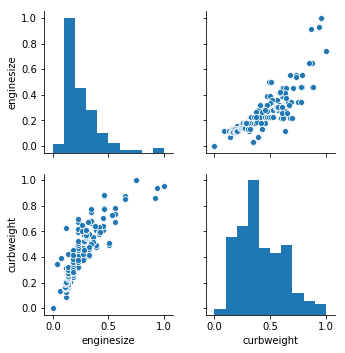

In [35]:
sns.pairplot(col3[['enginesize','curbweight']])

### Engine-size and curbweight are related so we can remove either of them

In [36]:
col4 = col3.drop('curbweight',axis=1)

In [37]:
vif_cal(input_data=col4,dependent_col='price')

,Var,Vif
2,enginesize,61.66
1,cylindernumber,25.15
12,Torque,18.65
13,EngineDisplacement,18.53
3,boreratio,16.43
0,car_ID,8.82
4,peakrpm,5.66
8,buick,2.05
9,jaguar,1.79
11,toyota,1.72


In [38]:
col5 = col4.drop('enginesize',axis = 1)

In [39]:
# car.columns
vif_cal(input_data=col5,dependent_col='price')

,Var,Vif
1,cylindernumber,19.74
12,EngineDisplacement,15.15
2,boreratio,13.23
11,Torque,10.99
0,car_ID,8.75
3,peakrpm,4.53
7,buick,1.73
10,toyota,1.71
8,jaguar,1.57
6,bmw,1.53


### Graph wise the Torque, Bore ratio and the Cylinder number are related, so we will remove them in the future datasets

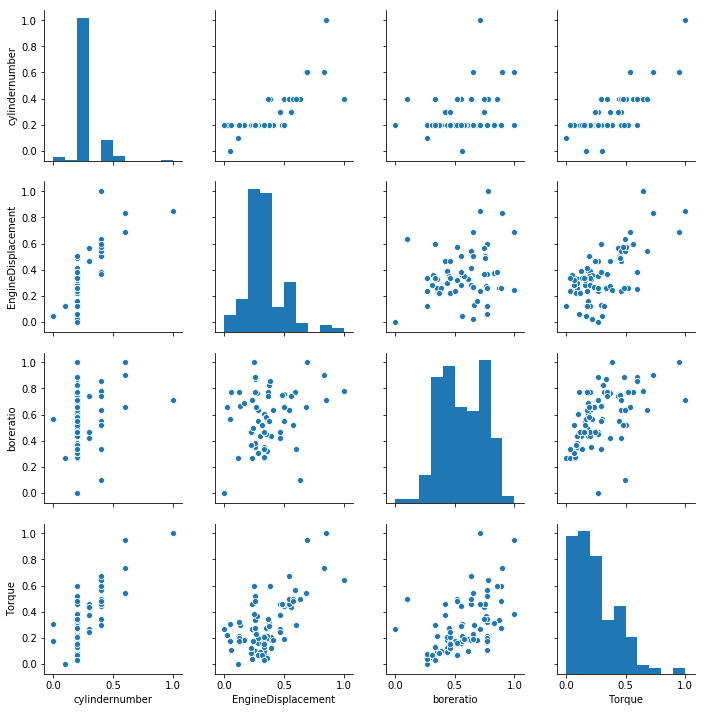

In [40]:
sns.pairplot(col5[['cylindernumber','EngineDisplacement','boreratio','Torque']])

In [41]:
col6 = col5.drop(['EngineDisplacement','boreratio'],axis = 1)

In [42]:
vif_cal(input_data=col6,dependent_col='price')

,Var,Vif
1,cylindernumber,12.49
10,Torque,7.94
0,car_ID,5.72
2,peakrpm,3.94
6,buick,1.68
9,toyota,1.62
7,jaguar,1.53
5,bmw,1.46
4,audi,1.28
8,porsche,1.25


In [43]:
# ca1 = car[['enginelocation','carwidth','cylindernumber','price','stroke','dohcv',
#             'enginesize','peugeot','bmw','boreratio']]
# vif_cal(input_data=ca1,dependent_col='price')
col7 = col6.drop('cylindernumber',axis=1)

In [44]:
# model2 =car[['enginelocation','price','dohcv','enginesize','peugeot','bmw']]
vif_cal(input_data=col7,dependent_col='price')

,Var,Vif
9,Torque,5.42
0,car_ID,5.12
1,peakrpm,3.10
8,toyota,1.61
5,buick,1.41
6,jaguar,1.37
4,bmw,1.35
7,porsche,1.25
3,audi,1.24
2,alfa,1.11


In [45]:
col8 = col7.drop('car_ID',axis = 1)

In [46]:
vif_cal(input_data=col8,dependent_col='price')

,Var,Vif
8,Torque,3.74
0,peakrpm,2.37
4,buick,1.36
5,jaguar,1.25
6,porsche,1.20
3,bmw,1.16
7,toyota,1.16
2,audi,1.08
1,alfa,1.04


In [47]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# %matplotlib inline

col8.head()

,peakrpm,alfa,audi,bmw,buick,jaguar,porsche,toyota,Torque,price
0,0.346939,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.297482,0.207959
1,0.346939,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.297482,0.282558
2,0.346939,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.497537,0.282558
3,0.551020,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.212470,0.219254
4,0.551020,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.267453,0.306142


## Building my first model

In [48]:
X = col8.iloc[:,0:9]
y = col8['price']
X.head()

,peakrpm,alfa,audi,bmw,buick,jaguar,porsche,toyota,Torque
0,0.346939,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.297482
1,0.346939,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.297482
2,0.346939,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.497537
3,0.551020,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.212470
4,0.551020,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.267453


In [49]:
#splitting the values
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=100)

In [50]:
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.intercept_)

-0.00045983183144091


In [51]:
coeff_df = pd.DataFrame(lm.coef_,X_test.columns,columns=['Coefficient'])

In [52]:
coeff_df

,Coefficient
peakrpm,0.025103
alfa,0.022875
audi,0.119096
bmw,0.258633
buick,0.339275
jaguar,0.251273
porsche,0.180870
toyota,-0.024713
Torque,0.622153


In [53]:
# Let us predict the values.
y_pred = lm.predict(X_test)

In [54]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [55]:
display(mse,r_squared)

0.005164009290238425

0.8803450850953314

In [56]:
import statsmodels.api as sm
X_train_sm = X_train
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X_train_sm = sm.add_constant(X_train_sm)
# create a fitted model in one line
lm_1 = sm.OLS(y_train,X_train_sm).fit()
# print the coefficients
lm_1.params

const     -0.000460
peakrpm    0.025103
alfa       0.022875
audi       0.119096
bmw        0.258633
buick      0.339275
jaguar     0.251273
porsche    0.180870
toyota    -0.024713
Torque     0.622153
dtype: float64

In [57]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     90.69
Date:                Wed, 29 Aug 2018   Prob (F-statistic):           2.40e-52
Time:                        11:41:16   Log-Likelihood:                 172.76
No. Observations:                 143   AIC:                            -325.5
Df Residuals:                     133   BIC:                            -295.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0005      0.020     -0.023      0.9

In [58]:
col9 = col8.drop(['alfa','peakrpm','toyota'],axis=1)

## Now let's make the second model

In [59]:
X = col9.iloc[:,0:6]
y = col9['price']
X.head()

,audi,bmw,buick,jaguar,porsche,Torque
0,0.0,0.0,0.0,0.0,0.0,0.297482
1,0.0,0.0,0.0,0.0,0.0,0.297482
2,0.0,0.0,0.0,0.0,0.0,0.497537
3,1.0,0.0,0.0,0.0,0.0,0.212470
4,1.0,0.0,0.0,0.0,0.0,0.267453


In [60]:
#splitting the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=100)

In [61]:
lm1 = LinearRegression()
lm1.fit(X_train,y_train)
print(lm1.intercept_)

0.007208127133711856


## Let us check the coefficients and see if any variables has a negative coefficient

In [62]:
coeff_car = pd.DataFrame(lm1.coef_,X_test.columns,columns=['Coefficient'])

In [63]:
coeff_car

,Coefficient
audi,0.126806
bmw,0.260707
buick,0.337625
jaguar,0.254309
porsche,0.192379
Torque,0.617295


### The cell below tells us about the Mean squared Error and the R_squared error of our model

In [64]:
y_pred = lm1.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
display(mse,r_squared)

0.005380226102058393

0.8753351397669638

#### These values are acceptable and we will go ahead to plot this model 

In [65]:
X_train_sm = X_train
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X_train_sm = sm.add_constant(X_train_sm)
# create a fitted model in one line
lm1_1 = sm.OLS(y_train,X_train_sm).fit()
# print the coefficients
lm1_1.params

const      0.007208
audi       0.126806
bmw        0.260707
buick      0.337625
jaguar     0.254309
porsche    0.192379
Torque     0.617295
dtype: float64

In [66]:
print(lm1_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     135.3
Date:                Wed, 29 Aug 2018   Prob (F-statistic):           8.11e-55
Time:                        11:41:17   Log-Likelihood:                 171.07
No. Observations:                 143   AIC:                            -328.1
Df Residuals:                     136   BIC:                            -307.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0072      0.012      0.610      0.5

# Clearly we can see that the difference betweeen the R-squared and Adjusted R-squared value is really less so we can plot this model.

Text(0,0.5,'Price')

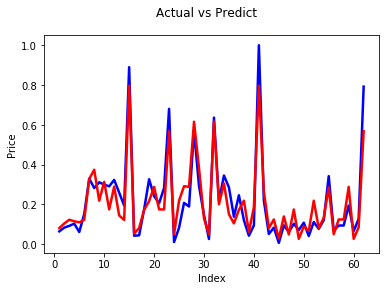

In [67]:
import matplotlib.pyplot as plt
c = [i for i in range(1,63,1)]
plt.figure()
plt.plot(c,y_test, color = 'blue', linewidth = 2.5, linestyle='-')
plt.plot(c,y_pred, color = 'red', linewidth = 2.5, linestyle='-')
plt.suptitle("Actual vs Predict")
plt.xlabel("Index")
plt.ylabel("Price")

### Let's see how well the model fits using RMSE

In [68]:
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

RMSE : 0.08893206484362778


### Let's check the distribution of our error terms

Text(0.5,0.98,'Error')

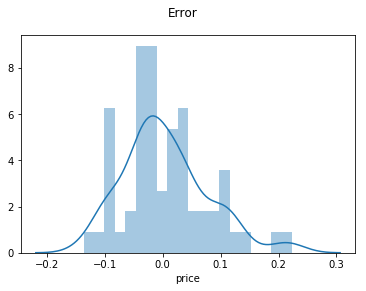

In [69]:
fig = plt.figure()
sns.distplot(y_test-y_pred, bins=20)
fig.suptitle("Error")

Text(0,0.5,'Price')

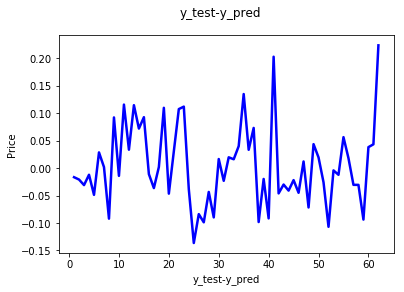

In [70]:
plt.figure()
plt.plot(c,y_test-y_pred, color = 'blue', linewidth = 2.5, linestyle='-')
#plt.plot(c,y_pred, color = 'red', linewidth = 2.5, linestyle='-')
plt.suptitle("y_test-y_pred")
plt.xlabel("y_test-y_pred")
plt.ylabel("Price")

## We can see that torque directly influences the price of the car

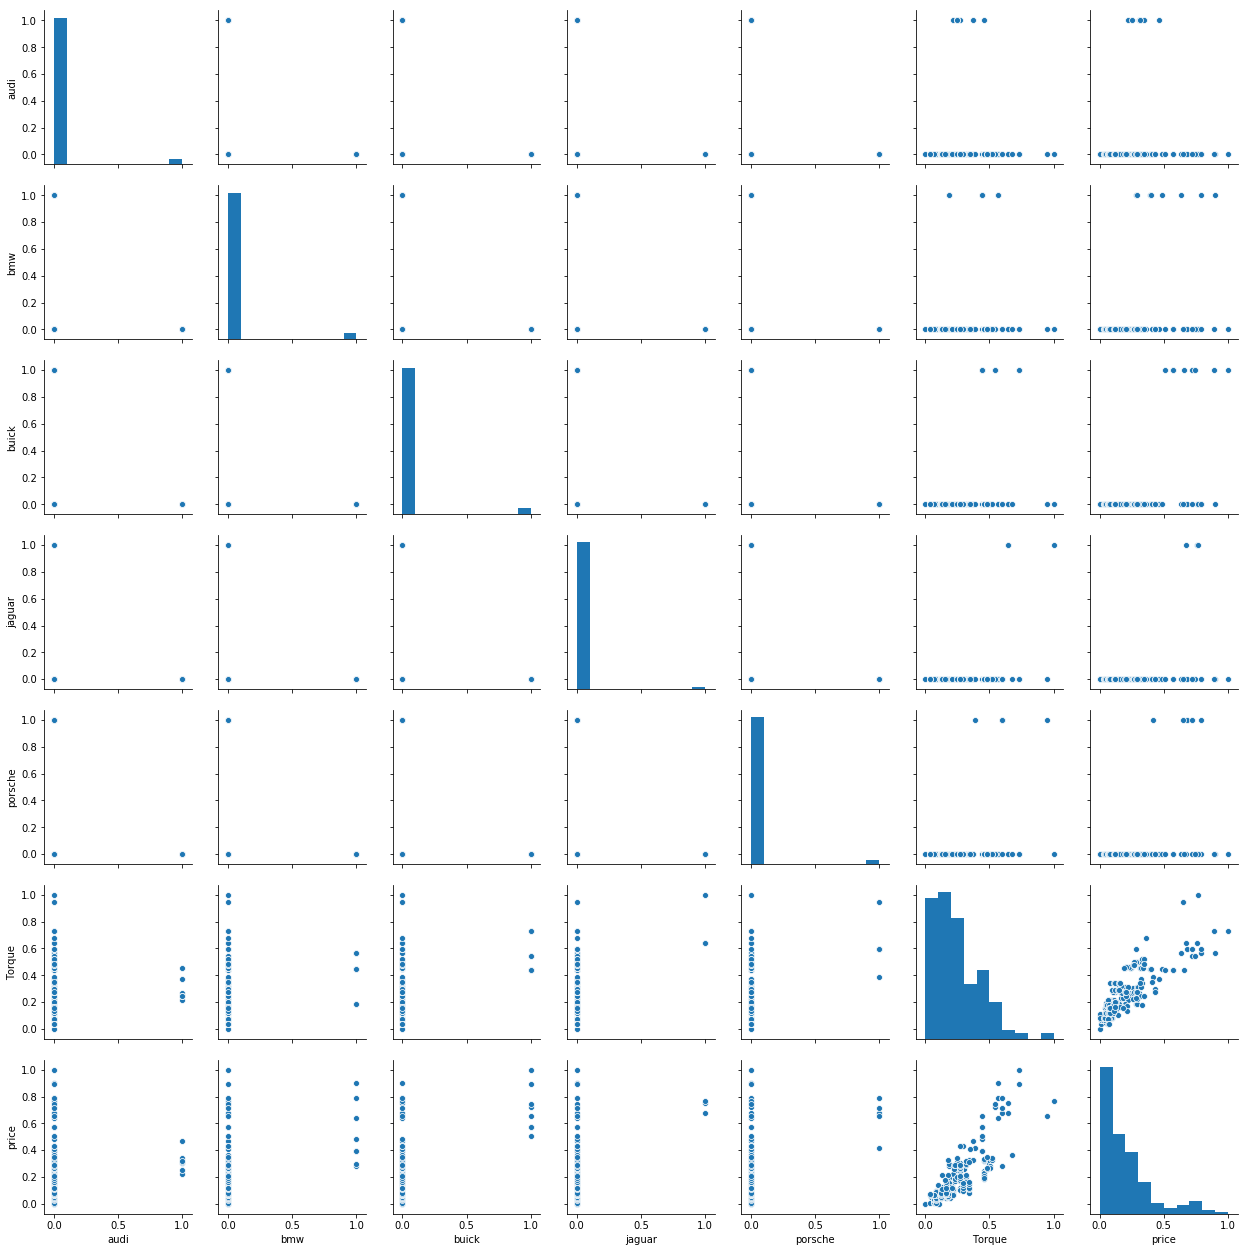

In [71]:
sns.pairplot(col9)

# Finally let's check how does the correlation matrix match out with our variables

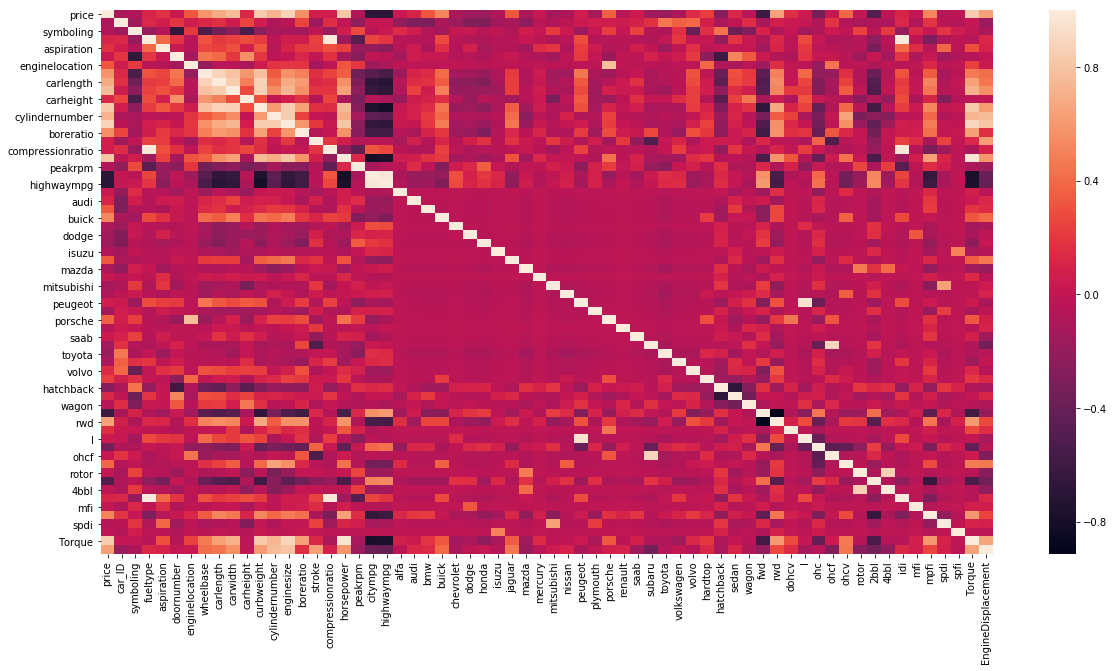

In [72]:
cor = car.corr()
plt.figure(figsize=(20,10))
sns.heatmap(cor)

## Visualization of test bs trained R squared

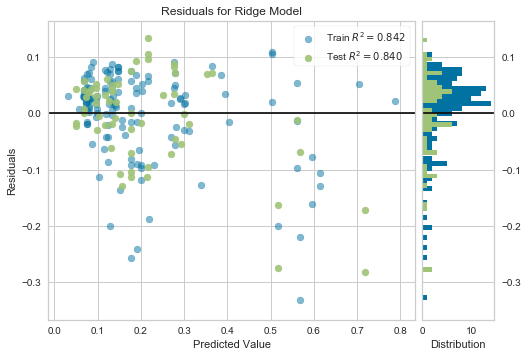

In [73]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
ridge = Ridge()
visualizer = ResidualsPlot(ridge)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()  